In [1]:
from GoogleNews import GoogleNews
import pandas as pd
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from numpy import *

In [2]:
# search critia
search = 'AMZN'
start = '01/01/2020'
end = '01/01/2021'

In [3]:
# search for news in period from start 
googlenews = GoogleNews(start=start,end=end)
googlenews.search(search)
# pull the first 50 pages of the search and put data into df
for i in range(2,50):
    googlenews.getpage(i)
    result=googlenews.result()
    df=pd.DataFrame(result)
df

'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable


,title,media,date,datetime,desc,link,img
0,Amazon.com Inc (AMZN) Q1 2020 Earnings Call Tr...,Motley Fool,"Apr 30, 2020",2020-04-30,AMZN earnings call for the period ending March...,https://www.fool.com/earnings/call-transcripts...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
1,"'If you're a shareowner in Amazon, you may wan...",CNBC,"on · Apr 30, 2020",2020-04-30,Amazon said it plans to spend all of its profi...,https://www.cnbc.com/2020/04/30/amazon-amzn-q1...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
2,"Amazon (AMZN) Stock Is a Winner, But How Much ...",Yahoo Finance,"Apr 30, 2020",2020-04-30,While the major market indexes are all down ro...,https://finance.yahoo.com/news/amazon-amzn-sto...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
3,Amazon (AMZN) Q2 2020 Earnings Call Transcript,Motley Fool,"Jul 31, 2020",2020-07-31,Logo of jester cap with thought bubble. Image ...,https://www.fool.com/earnings/call-transcripts...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
4,Amazon.com's (AMZN) Management on Q2 2020 Resu...,Seeking Alpha,"Jul 30, 2020",2020-07-30,"Amazon.com, Inc. (NASDAQ:AMZN) Q2 2020 Earning...",https://seekingalpha.com/article/4362687-amazo...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
...,...,...,...,...,...,...,...
251,Scorpio Tankers Inc. (STNG) Soars 3% on Novemb...,,"Nov 24, 2020",2020-11-24,AMZN. loading... HD. loading... JPM. loading.....,https://www.equities.com/news/scorpio-tankers-...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
252,Neos Therapeutics Inc. (NEOS) Settles Into New...,,"Sep 30, 2020",2020-09-30,AMZN. loading... HD. loading... JPM. loading.....,https://www.equities.com/news/neos-therapeutic...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
253,Stick or twist? Investors face coronavirus-ind...,Reuters,"May 28, 2020",2020-05-28,N and Amazon AMZN.O have soared. Savills SVS.L...,https://www.reuters.com/article/uk-health-coro...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
254,Open Enrollment Looks a Little Different This ...,Investopedia,"Nov 11, 2020",2020-11-11,Popular Stocks. Apple (AAPL) · Tesla (TSLA) · ...,https://www.investopedia.com/open-enrollment-l...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."


In [4]:
# calculate the datetime
df['date'] = df['datetime'].dt.date
count = df['date'].value_counts().to_frame() 
average = count.mean()
average

date    1.542169
dtype: float64

In [5]:
# organize count
count.reset_index(inplace=True)
count = count.sort_values('index')
count.reset_index(inplace=True)
count = count.drop(columns = ['level_0'])
count = count.rename(columns={'index': "Date", "date": "Frequency"})
count

,Date,Frequency
0,2020-01-06,4
1,2020-01-07,1
2,2020-01-13,1
3,2020-01-14,1
4,2020-01-17,1
...,...,...
161,2020-12-17,2
162,2020-12-20,1
163,2020-12-21,2
164,2020-12-22,1


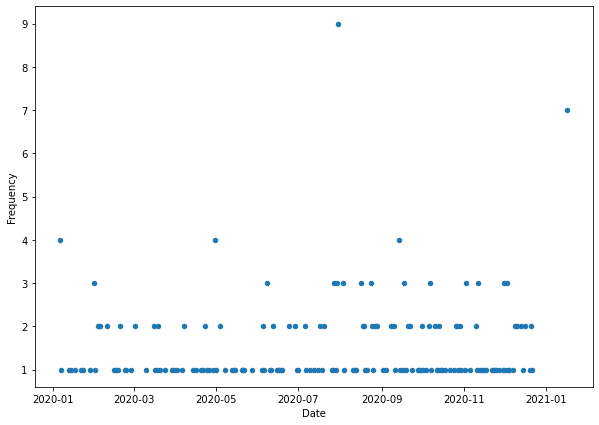

In [6]:
# scatter count
count.plot(x = 'Date', y='Frequency',figsize = (10,7),kind='scatter')

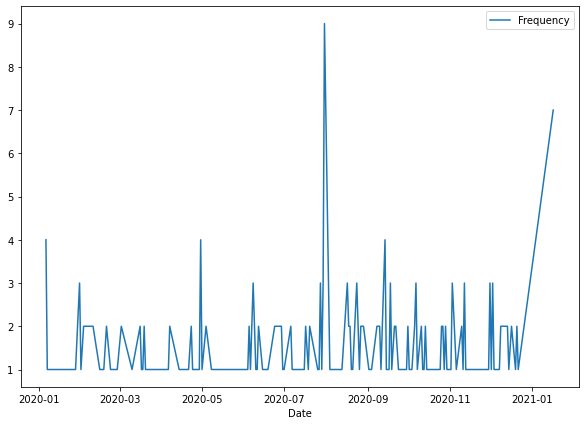

In [7]:
# line count
count.plot(x = 'Date', y='Frequency',figsize = (10,7),kind='line')

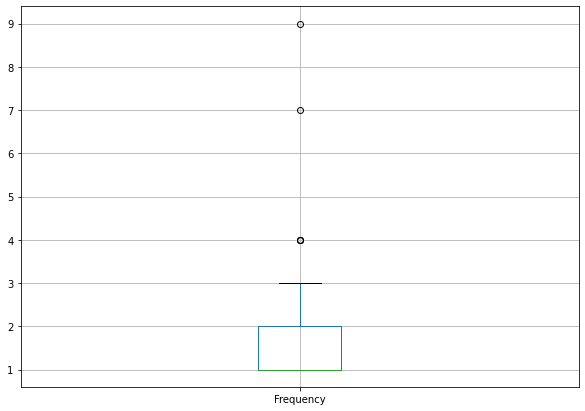

In [8]:
# find abnomal
count.boxplot(figsize = (10,7))

In [9]:
# find IQR
Q1 = np.percentile(count['Frequency'],25)
Q3 = np.percentile(count['Frequency'],75)
IQR = Q3-Q1
Q1,Q3

(1.0, 2.0)

In [10]:
# download stock data for amzn
import yfinance as yf
data = yf.download(search, start='2020-01-01', end='2021-01-17', interval = '1d')
data = data[['Close']]
data

[*********************100%***********************]  1 of 1 completed


,Close
Date,
2020-01-02,1898.010010
2020-01-03,1874.969971
2020-01-06,1902.880005
2020-01-07,1906.859985
2020-01-08,1891.969971
...,...
2021-01-11,3114.209961
2021-01-12,3120.830078
2021-01-13,3165.889893


In [11]:
count = count.set_index('Date')
count['Stock'] = data['Close']

count['Stock_chg'] = np.log(count.Stock) - np.log(count.Stock.shift(1))
count['Frequency_chg'] = np.log(count.Frequency) - np.log(count.Frequency.shift(1))
count

,Frequency,Stock,Stock_chg,Frequency_chg
Date,,,,
2020-01-06,4,1902.880005,NaN,NaN
2020-01-07,1,1906.859985,0.002089,-1.386294
2020-01-13,1,1891.300049,-0.008193,0.000000
2020-01-14,1,1869.439941,-0.011626,0.000000
2020-01-17,1,1864.719971,-0.002528,0.000000
...,...,...,...,...
2020-12-17,2,3236.080078,0.022172,0.693147
2020-12-20,1,NaN,NaN,-0.693147
2020-12-21,2,3206.179932,NaN,0.693147


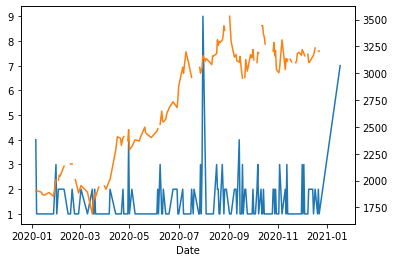

In [12]:
plt.figure()
ax = count['Frequency'].plot()
ax = count['Stock'].plot(secondary_y = True)

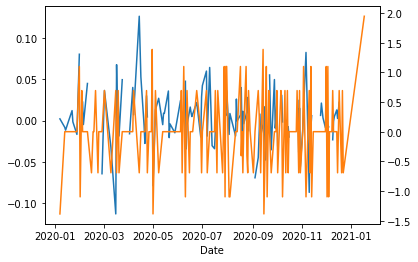

In [13]:
plt.figure()

ax = count['Stock_chg'].plot()
ax = count['Frequency_chg'].plot(secondary_y = True)